In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

import joblib 
import re
import string
import unicodedata
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [2]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.preprocess(text) for text in X]

    def preprocess(self, text):
        # print(textes)
        text = str(text)
        text = text.lower()
        normalized = unicodedata.normalize("NFD", text)
        text = "".join(c for c in normalized if unicodedata.category(c) != "Mn")
        text = re.sub(r'\[.*?\]', '', text)
        text = re.sub(r"\\W", " ", text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'<.*?>+', '', text)
        text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub(r'\n', '', text)
        text = re.sub(r'\w*\d\w*', '', text)
        return text

In [3]:
# Swap between these
# pipeline_lr.joblib
# pipeline_mlp.joblib
# pipeline_rf.joblib
# pipeline_xgb.joblib

stack = joblib.load('../../Models/70-30 Test/pipeline_lr.joblib')

training = pd.read_csv('../../Data Splits/test_data.csv')

training_x = training['article']

training_y = training['label']

x = stack.named_steps['vectorizer'].transform(training_x)
print(x.shape)



(321, 31742)


Metrics for MNB:
Accuracy: 0.822429906542056
Precision: 0.7464114832535885
Recall: 0.975
F1 Score: 0.8455284552845529
AUC: 0.9767857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.67      0.79       161
           1       0.75      0.97      0.85       160

    accuracy                           0.82       321
   macro avg       0.86      0.82      0.82       321
weighted avg       0.86      0.82      0.82       321



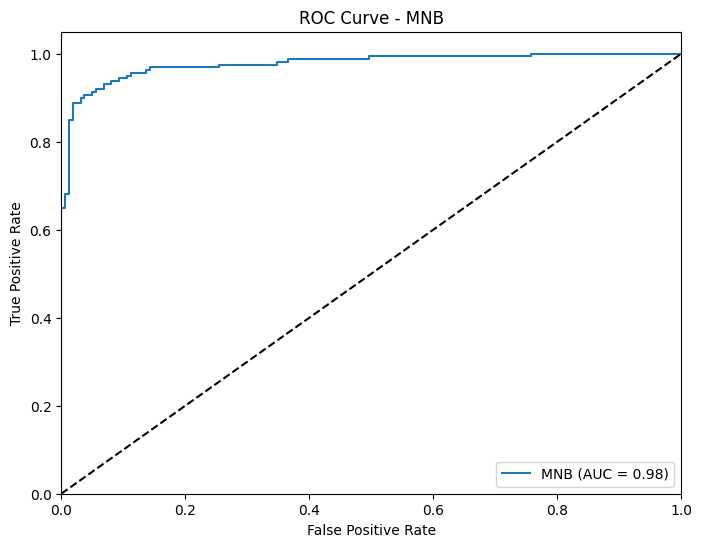

Metrics for LR:
Accuracy: 0.9252336448598131
Precision: 0.9473684210526315
Recall: 0.9
F1 Score: 0.9230769230769231
AUC: 0.9842003105590063
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       161
           1       0.95      0.90      0.92       160

    accuracy                           0.93       321
   macro avg       0.93      0.93      0.93       321
weighted avg       0.93      0.93      0.93       321



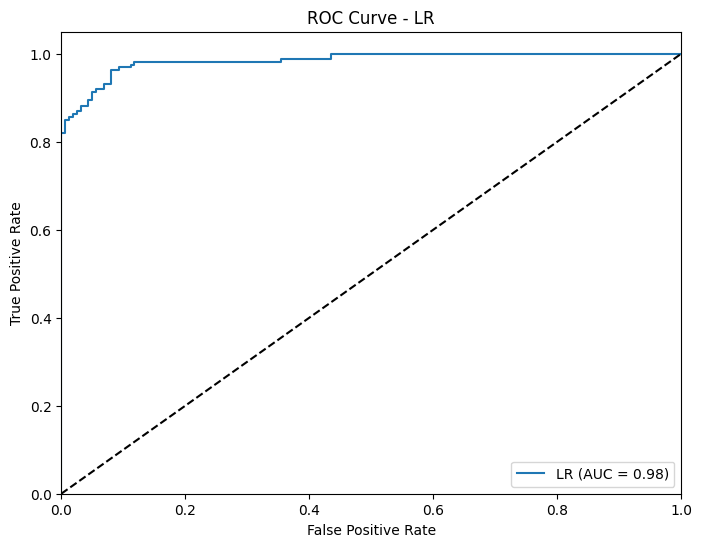

Metrics for RF:
Accuracy: 0.9221183800623053
Precision: 0.9245283018867925
Recall: 0.91875
F1 Score: 0.9216300940438872
AUC: 0.9763975155279503
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       161
           1       0.92      0.92      0.92       160

    accuracy                           0.92       321
   macro avg       0.92      0.92      0.92       321
weighted avg       0.92      0.92      0.92       321



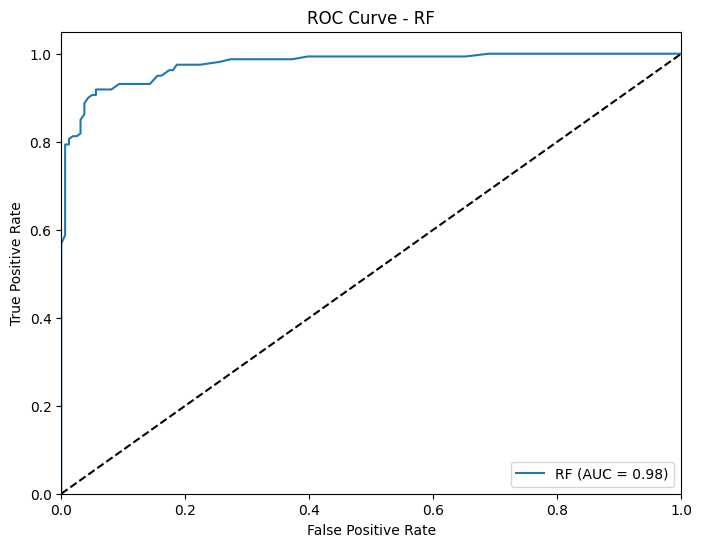

Metrics for KNN:
Accuracy: 0.881619937694704
Precision: 0.8279569892473119
Recall: 0.9625
F1 Score: 0.8901734104046243
AUC: 0.9633734472049689
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       161
           1       0.83      0.96      0.89       160

    accuracy                           0.88       321
   macro avg       0.89      0.88      0.88       321
weighted avg       0.89      0.88      0.88       321



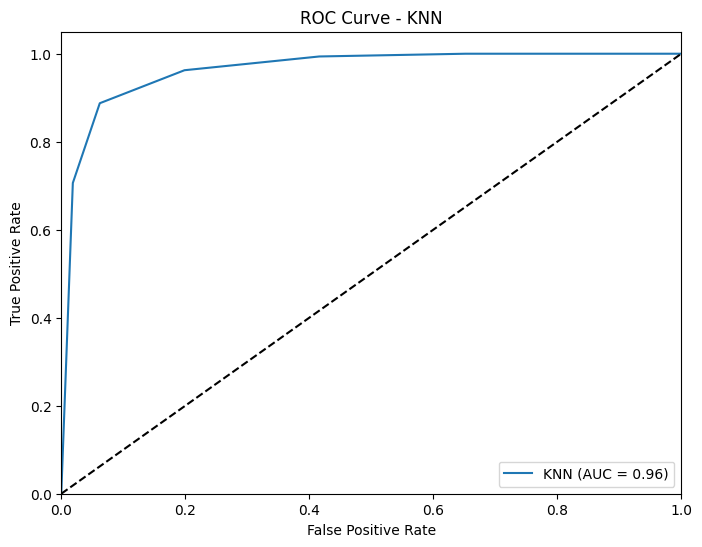

Metrics for SVM:
Accuracy: 0.9470404984423676
Precision: 0.9863945578231292
Recall: 0.90625
F1 Score: 0.9446254071661238
AUC: 0.9871894409937888
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       161
           1       0.99      0.91      0.94       160

    accuracy                           0.95       321
   macro avg       0.95      0.95      0.95       321
weighted avg       0.95      0.95      0.95       321



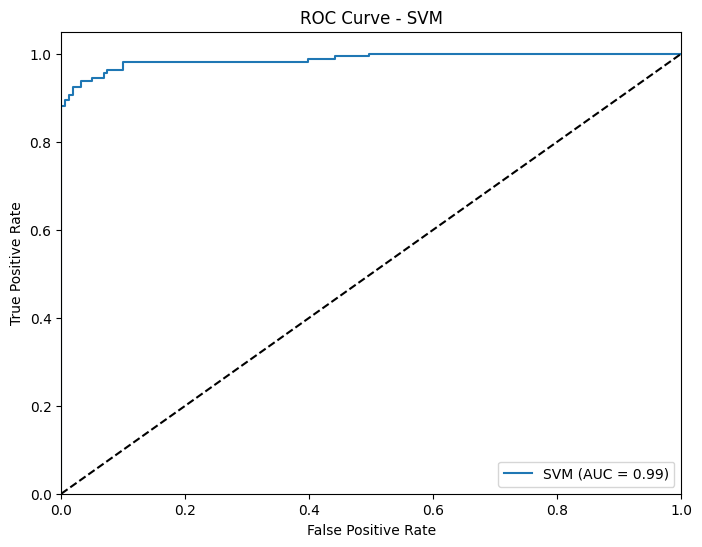

Metrics for Stacking Model:
Accuracy: 0.9626168224299065
Precision: 0.9805194805194806
Recall: 0.94375
F1 Score: 0.9617834394904459
AUC: 0.992585403726708
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       161
           1       0.98      0.94      0.96       160

    accuracy                           0.96       321
   macro avg       0.96      0.96      0.96       321
weighted avg       0.96      0.96      0.96       321



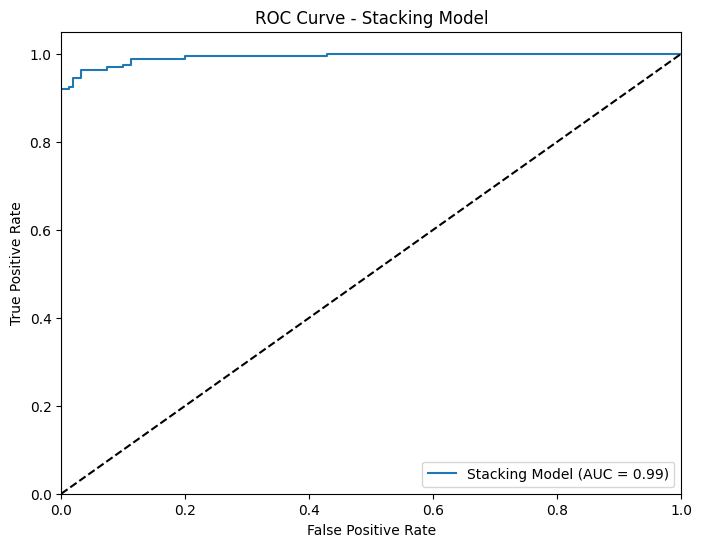

Comparison of Models:
                Accuracy Precision   Recall  F1 Score       AUC
MNB              0.82243  0.746411    0.975  0.845528  0.976786
LR              0.925234  0.947368      0.9  0.923077    0.9842
RF              0.922118  0.924528  0.91875   0.92163  0.976398
KNN              0.88162  0.827957   0.9625  0.890173  0.963373
SVM              0.94704  0.986395  0.90625  0.944625  0.987189
Stacking Model  0.962617  0.980519  0.94375  0.961783  0.992585


In [4]:
base_names = ['MNB', 'LR', 'RF', 'KNN', 'SVM']
metrics_df = pd.DataFrame(index=base_names + ['Stacking Model'], columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

vectorized_text = stack.named_steps['vectorizer'].transform(training_x)

# Evaluate base models
for model, name in  zip(stack.named_steps['stacking'].estimators_ , base_names):
    y_pred = model.predict(vectorized_text)
    y_prob = model.predict_proba(vectorized_text)[:, 1]  # Probability for positive class for ROC curve
    
    accuracy = accuracy_score(training_y, y_pred)
    precision = precision_score(training_y, y_pred)
    recall = recall_score(training_y, y_pred)
    f1 = f1_score(training_y, y_pred)
    auc = roc_auc_score(training_y, y_prob)

    print(f"Metrics for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc}")
    print(f"Classification Report:\n{classification_report(training_y, y_pred)}")

    # Store metrics in the DataFrame
    metrics_df.loc[name] = [accuracy, precision, recall, f1, auc]

    # ROC Curve
    fpr, tpr, _ = roc_curve(training_y, y_prob)
    roc_auc = roc_auc_score(training_y, y_prob)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()


# Evaluate stacking model
stack_y_pred = stack.predict(training_x)
stack_y_prob = stack.predict_proba(training_x)[:, 1]  # Probability for positive class for ROC curve

stack_accuracy = accuracy_score(training_y, stack_y_pred)
stack_precision = precision_score(training_y, stack_y_pred)
stack_recall = recall_score(training_y, stack_y_pred)
stack_f1 = f1_score(training_y, stack_y_pred)
stack_auc = roc_auc_score(training_y, stack_y_prob)

print("Metrics for Stacking Model:")
print(f"Accuracy: {stack_accuracy}")
print(f"Precision: {stack_precision}")
print(f"Recall: {stack_recall}")
print(f"F1 Score: {stack_f1}")
print(f"AUC: {stack_auc}")
print(f"Classification Report:\n{classification_report(training_y, stack_y_pred)}")

# ROC Curve for stacking model
stack_fpr, stack_tpr, _ = roc_curve(training_y, stack_y_prob)
stack_roc_auc = roc_auc_score(training_y, stack_y_prob)

# Store stacking model metrics in the DataFrame
metrics_df.loc['Stacking Model'] = [stack_accuracy, stack_precision, stack_recall, stack_f1, stack_auc]


# Plot ROC Curve for stacking model
plt.figure(figsize=(8, 6))
plt.plot(stack_fpr, stack_tpr, label=f'Stacking Model (AUC = {stack_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Model')
plt.legend(loc="lower right")
plt.show()

# Display the comparison table
print("Comparison of Models:")
print(metrics_df)